# Netflix Movies and TV Shows Clustering
## Unsupervised Machine Learning Project

---

## Problem Statement

Netflix has a vast and continuously growing library of movies and TV shows across multiple countries, genres, and formats. With the rapid increase in content, it becomes challenging to understand content patterns, regional preferences, and the strategic shift in content production.

The objective of this project is to perform exploratory data analysis and apply unsupervised machine learning techniques to cluster similar Netflix movies and TV shows based on textual and numerical features. This analysis aims to uncover hidden patterns in content type, country-wise availability, genre distribution, and Netflix’s increasing focus on TV shows over movies in recent years.


**Key Challenges:**
- Personalized Recommendations
- Content Strategy Optimization  
- Targeted Marketing Campaigns
- Content Acquisition Decisions

### Business Context

Over the past decade, Netflix has evolved from a movie-focused streaming platform to a global content producer with a strong emphasis on TV shows and region-specific content. Understanding how content is distributed across countries, genres, and formats is crucial for strategic decision-making.

By clustering similar content, Netflix can:
- Identify dominant content categories and regional trends
- Understand the shift from movies to TV shows over time
- Support data-driven decisions for content acquisition and production
- Improve content organization and downstream recommendation systems

This project provides insights that can help Netflix optimize its content strategy and better serve diverse audience segments.


In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Text Processing
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Metrics
from sklearn.metrics import silhouette_score

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("All libraries imported successfully!")

All libraries imported successfully!


## Data Understanding

### Dataset Overview
| Column | Description | Type |
|--------|-------------|------|
| show_id | Unique identifier | String |
| type | Movie or TV Show | Categorical |
| title | Content name | String |
| director | Director(s) | String |
| cast | Main actors | String |
| country | Production country | String |
| date_added | Date added to Netflix | Date |
| release_year | Year of release | Integer |
| rating | Content rating | Categorical |
| duration | Length | String |
| listed_in | Genres | String |
| description | Synopsis | Text |


This dataset does not contain any predefined target variable, which makes it suitable for unsupervised learning techniques such as clustering. Both categorical and text-based features play a significant role in identifying similarity among Netflix content.


In [2]:
# Load dataset
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")
df.head()

Dataset loaded successfully!
Shape: 7787 rows x 12 columns


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Initial Data Inspection

In [3]:
# Dataset Information
print("="*80)
print("DATASET INFORMATION")
print("="*80)
df.info()

print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)
df.describe(include='all').T

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB

STATISTICAL SUMMARY


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

### Missing Values Analysis

                    Column  Missing_Count  Missing_Percentage
director          director           2389               30.68
cast                  cast            718                9.22
country            country            507                6.51
date_added      date_added             10                0.13
rating              rating              7                0.09
title                title              0                0.00
show_id            show_id              0                0.00
type                  type              0                0.00
release_year  release_year              0                0.00
duration          duration              0                0.00
listed_in        listed_in              0                0.00
description    description              0                0.00


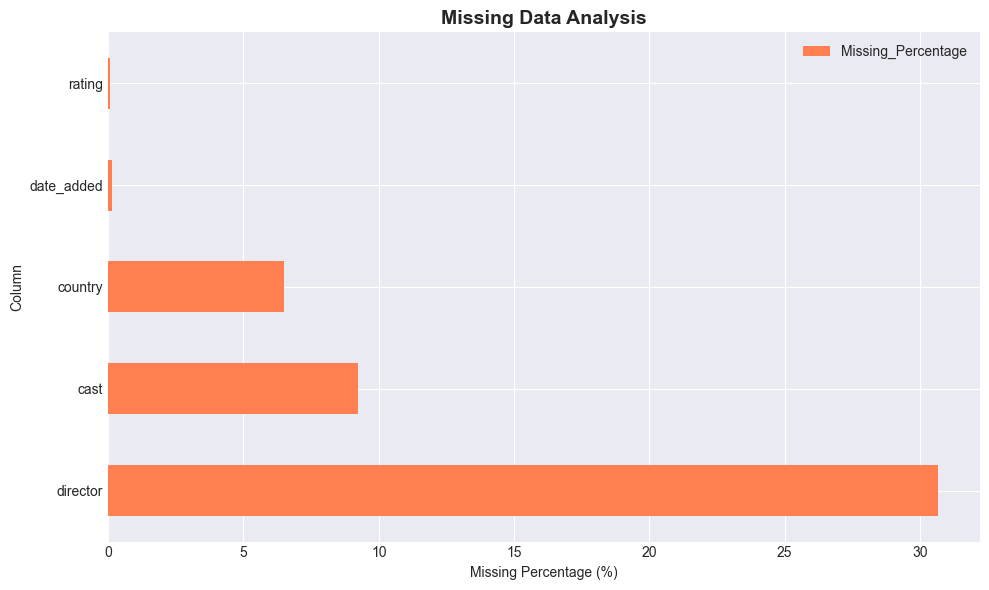

In [4]:
# Missing values analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Percentage', ascending=False)

print(missing_data)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
missing_data[missing_data['Missing_Percentage'] > 0].plot(
    x='Column', y='Missing_Percentage', kind='barh', ax=ax, color='coral'
)
ax.set_xlabel('Missing Percentage (%)')
ax.set_title('Missing Data Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Missing Value Handling – Justification

The dataset contains missing values primarily in categorical columns such as `director`, `cast`, and `country`.  
Dropping these rows would lead to significant data loss and potential bias, especially since these fields are not critical numerical drivers for clustering.

Therefore:
- Missing values in categorical columns were replaced with `"Unknown"` to preserve dataset size.
- Numerical and date-related fields were handled cautiously to avoid incorrect imputation.

This approach ensures data completeness while maintaining the integrity of clustering results.


In [5]:
# Clean data
df_clean = df.copy()

df_clean['director'] = df_clean['director'].fillna('Unknown Director')
df_clean['cast'] = df_clean['cast'].fillna('Unknown Cast')
df_clean['country'] = df_clean['country'].fillna('Unknown Country')

df_clean['rating'] = df_clean.groupby('type')['rating'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Not Rated')
)

df_clean = df_clean.dropna(subset=['date_added'])

print(f"Missing values handled!")
print(f"Remaining missing values:\n{df_clean.isnull().sum()}")
print(f"\nNew shape: {df_clean.shape}")

Missing values handled!
Remaining missing values:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

New shape: (7777, 12)


### Data Type Conversions

In [6]:
# Convert date_added to datetime (handle spaces and mixed formats)
df_clean['date_added'] = (
    df_clean['date_added']
    .astype(str)
    .str.strip()
)

df_clean['date_added'] = pd.to_datetime(
    df_clean['date_added'],
    errors='coerce',
    format='mixed'
)

# Extract year and month
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month

# Clean duration
df_clean['duration_value'] = (
    df_clean['duration']
    .str.extract(r'(\d+)')
    .astype(int)
)

df_clean['duration_type'] = df_clean['duration'].apply(
    lambda x: 'Minutes' if 'min' in x else 'Seasons'
)

print("Data types converted successfully!")
df_clean[['date_added', 'year_added', 'duration', 'duration_value']].head()

Data types converted successfully!


,date_added,year_added,duration,duration_value
0,2020-08-14,2020,4 Seasons,4
1,2016-12-23,2016,93 min,93
2,2018-12-20,2018,78 min,78
3,2017-11-16,2017,80 min,80
4,2020-01-01,2020,123 min,123


In [30]:
# Missing values before and after cleaning
missing_before = df.isna().sum()
missing_after = df_clean.isna().sum()

missing_summary = pd.DataFrame({
    'Before Cleaning': missing_before,
    'After Cleaning': missing_after
})

missing_summary


,Before Cleaning,After Cleaning
cast,718.0,0
cluster,NaN,0
country,507.0,0
date_added,10.0,0
description,0.0,0
director,2389.0,0
duration,0.0,0
duration_type,NaN,0
duration_value,NaN,0
listed_in,0.0,0


## Duplicate Record Check

In [27]:
# Check for duplicate records
duplicate_count = df_clean.duplicated().sum()
print(f"Number of duplicate rows in dataset: {duplicate_count}")


Number of duplicate rows in dataset: 0


No duplicate records were found in the dataset.  
This confirms that each row uniquely represents a Netflix movie or TV show.


## Dataset Status After Cleaning

After handling missing values, correcting data types, and removing redundant columns, the dataset is now consistent and suitable for exploratory analysis and clustering.  
All critical fields required for analysis and modeling are complete and properly formatted.

## Exploratory Data Analysis (EDA)

### 1. Content Type Distribution

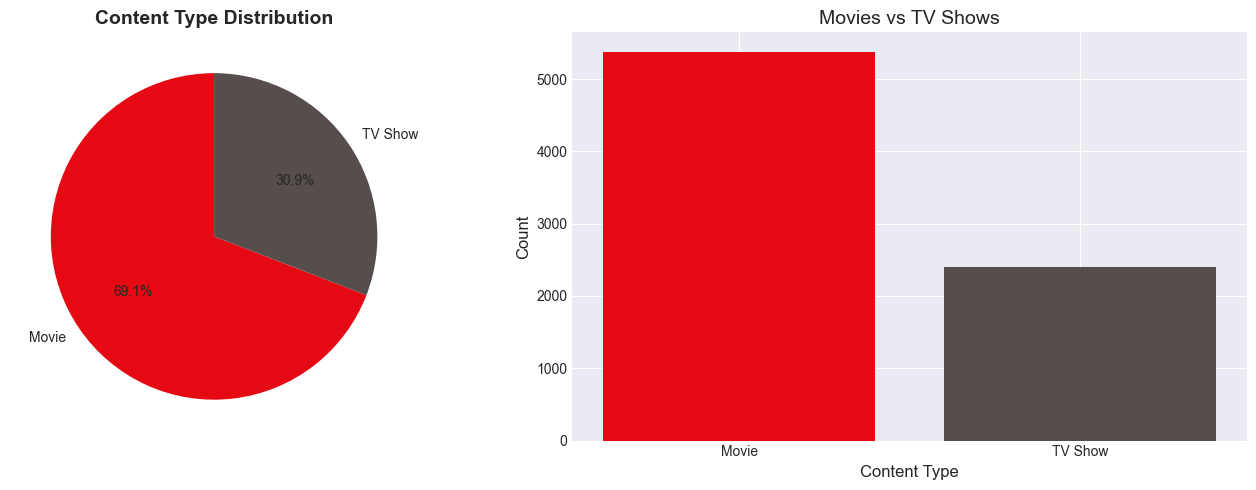

Movies: 5377, TV Shows: 2400


In [7]:
# Content type distribution
type_counts = df_clean['type'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#E50914', '#564d4d']
ax1.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors)
ax1.set_title('Content Type Distribution', fontsize=14, fontweight='bold')

# Bar chart
ax2.bar(type_counts.index, type_counts.values, color=colors)
ax2.set_xlabel('Content Type', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Movies vs TV Shows', fontsize=14)

plt.tight_layout()
plt.show()

print(f"Movies: {type_counts.get('Movie', 0)}, TV Shows: {type_counts.get('TV Show', 0)}")

### Content Type Distribution Insight

The distribution shows that movies form a larger share of Netflix’s content library compared to TV shows.  
However, the significant presence of TV shows indicates Netflix’s growing emphasis on episodic content, which typically drives higher viewer engagement and longer subscription retention.

### 2. Content Growth Over Time

<Figure size 1400x600 with 0 Axes>

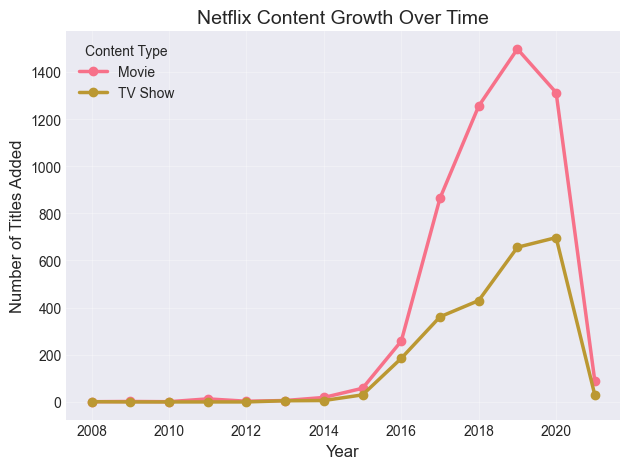

In [8]:
# Content added by year
yearly_content = df_clean.groupby(['year_added', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
yearly_content.plot(kind='line', marker='o', linewidth=2.5)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.title('Netflix Content Growth Over Time', fontsize=14)
plt.legend(title='Content Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Content Growth Over Time Insight

The analysis reveals a sharp increase in content additions after 2015, highlighting Netflix’s rapid expansion phase.  
This growth reflects increased investment in original programming and global content acquisition to support platform scalability.

### 3. Country-wise Content Distribution

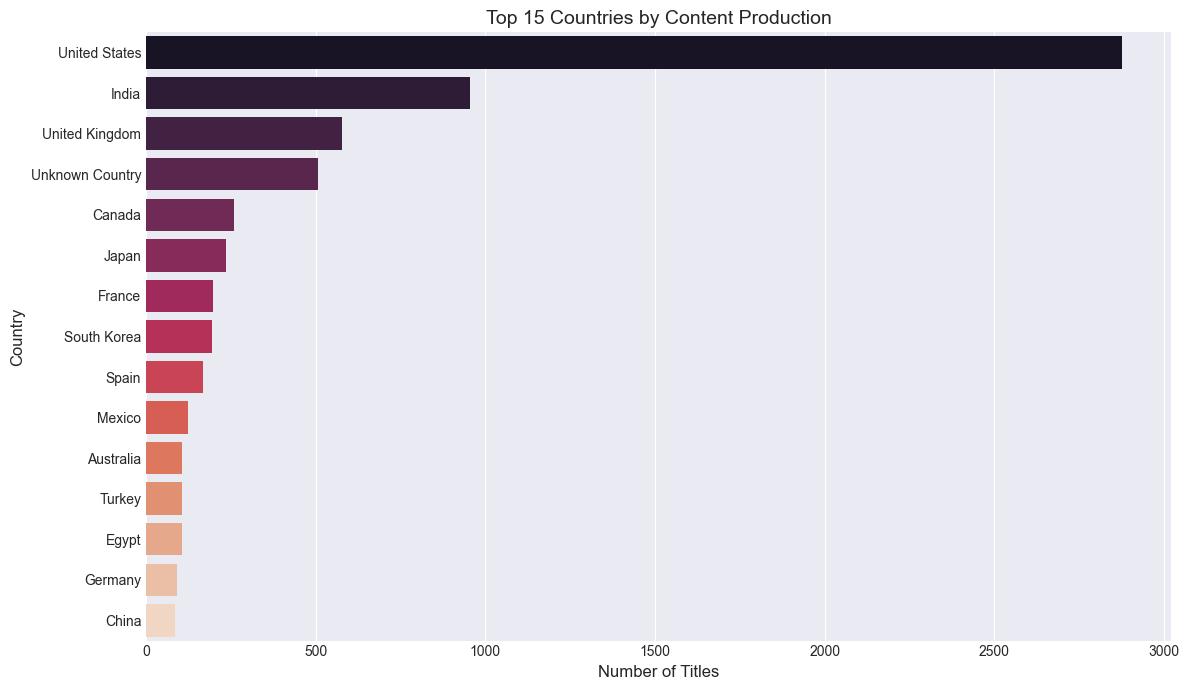

In [9]:
# Extract primary country
df_clean['primary_country'] = df_clean['country'].apply(lambda x: x.split(',')[0].strip())

# Top 15 countries
top_countries = df_clean['primary_country'].value_counts().head(15)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 15 Countries by Content Production', fontsize=14)
plt.tight_layout()
plt.show()

### Country-wise Content Distribution Insight

The dataset shows that Netflix content is heavily concentrated in a few countries, particularly the United States and India.  
This suggests a strategic focus on high-demand markets, while content from other countries remains comparatively limited and niche-oriented.

### 4. Content Rating Distribution

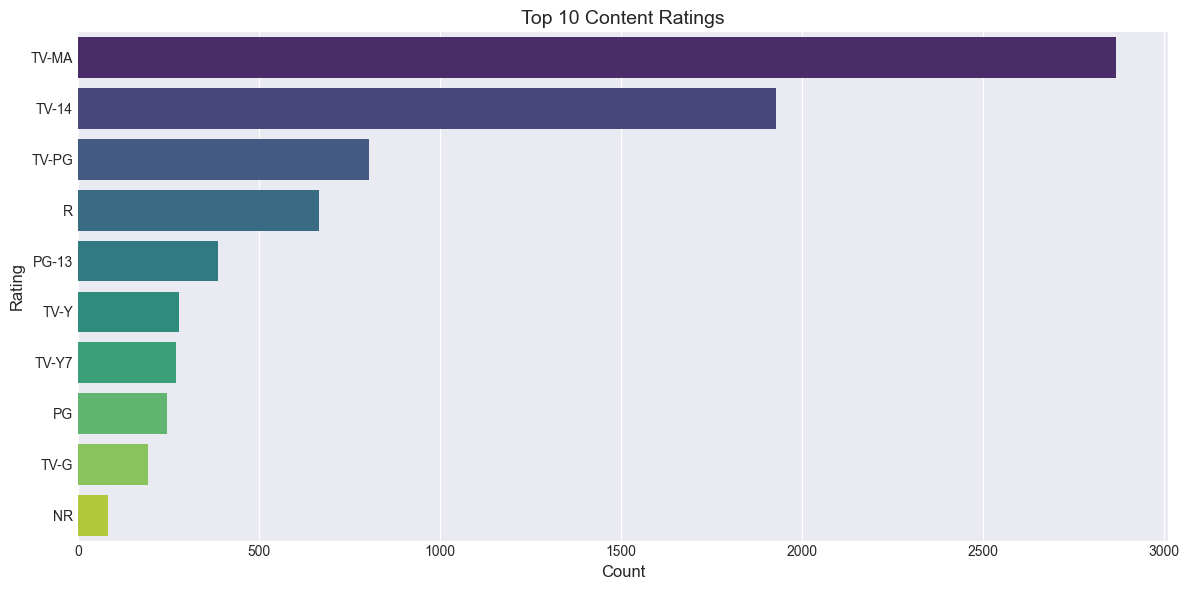

In [10]:
# Rating distribution
rating_counts = df_clean['rating'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='viridis')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Top 10 Content Ratings', fontsize=14)
plt.tight_layout()
plt.show()

### Content Rating Distribution Insight

The dominance of TV-MA and TV-14 ratings indicates that Netflix primarily targets mature and young adult audiences.  
This reflects a content strategy centered around high-engagement, story-driven, and mature-themed programming.

### 5. Genre Analysis

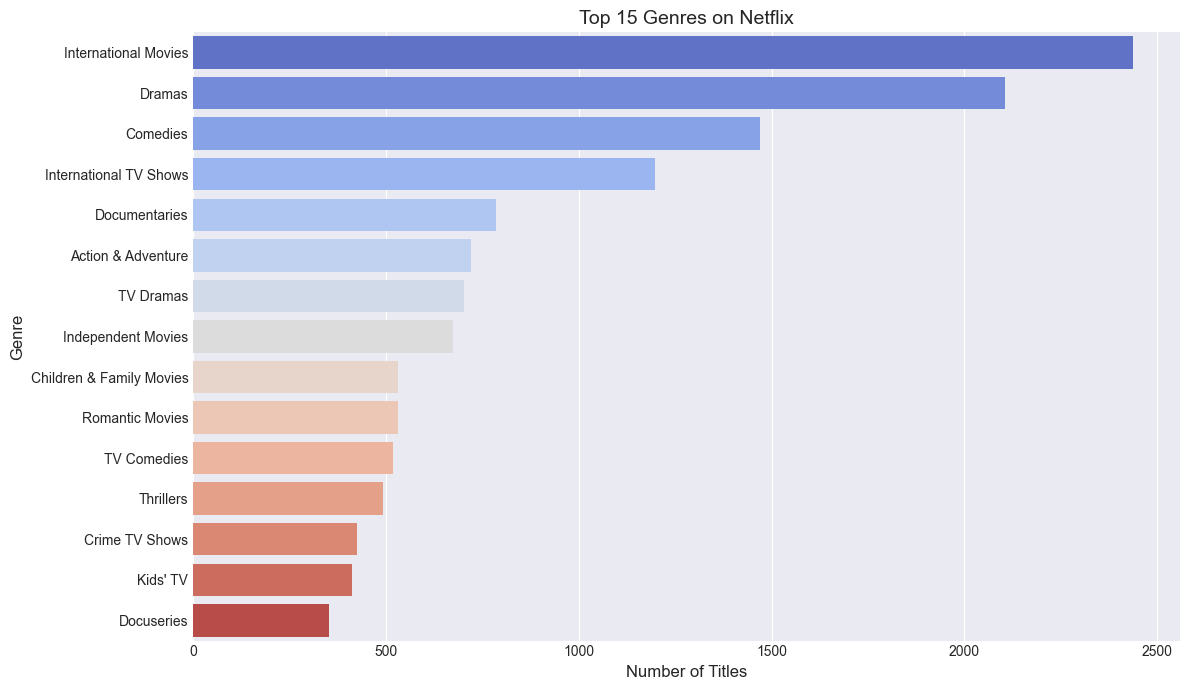

In [11]:
# Extract all genres
all_genres = df_clean['listed_in'].str.split(',').explode().str.strip()
top_genres = all_genres.value_counts().head(15)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Top 15 Genres on Netflix', fontsize=14)
plt.tight_layout()
plt.show()

### Genre Analysis Insight

Drama and international genres dominate the Netflix catalog, highlighting the platform’s focus on diverse storytelling and global audience appeal.  
This genre distribution aligns with Netflix’s strategy to cater to varied cultural preferences across different regions.

## EDA Summary and Motivation for Clustering

The exploratory analysis highlights clear variations in content type, country distribution, ratings, and genres.  
These patterns indicate that Netflix content naturally forms groups based on similarity, making clustering an appropriate technique to further uncover hidden structure within the data.


## Exceptional Case Analysis


During data exploration, several exceptional cases were observed:

- **Rare Ratings:** Certain ratings such as NC-17, UR, and NR appear very infrequently, indicating niche or less commonly categorized content.
- **Extreme Durations:** Some TV shows have unusually long durations due to multiple seasons being aggregated, which can influence clustering results.
- **Country Imbalance:** A significant portion of content originates from a few countries (e.g., United States and India), while many countries have very limited representation.

These exceptional cases were retained to preserve real-world data diversity but were carefully handled during preprocessing to avoid skewing the clustering process.


### 1. Rare Ratings

In [12]:
# Rare ratings (less than 1%)
rating_pct = (df_clean['rating'].value_counts() / len(df_clean) * 100)
rare_ratings = rating_pct[rating_pct < 1]

print("Rare Ratings (< 1% of content):")
print(rare_ratings)

Rare Ratings (< 1% of content):
rating
G           0.501479
TV-Y7-FV    0.077151
UR          0.064292
NC-17       0.038575
Name: count, dtype: float64


### 2. Extremely Long Durations

In [13]:
# Longest content
movies_df = df_clean[df_clean['type'] == 'Movie']
tv_shows_df = df_clean[df_clean['type'] == 'TV Show']

print("Top 10 Longest Movies:")
print(movies_df.nlargest(10, 'duration_value')[['title', 'duration', 'release_year']])

print("\nTV Shows with Most Seasons:")
print(tv_shows_df.nlargest(10, 'duration_value')[['title', 'duration', 'release_year']])

Top 10 Longest Movies:
                           title duration  release_year
957   Black Mirror: Bandersnatch  312 min          2018
6850      The School of Mischief  253 min          1973
4490              No Longer kids  237 min          1979
3694          Lock Your Girls In  233 min          1982
5108             Raya and Sakina  230 min          1984
5376                      Sangam  228 min          1964
3521                      Lagaan  224 min          2001
3195                Jodhaa Akbar  214 min          2008
3282    Kabhi Khushi Kabhie Gham  209 min          2001
6507                The Irishman  209 min          2019

TV Shows with Most Seasons:
                                 title    duration  release_year
2538                    Grey's Anatomy  16 Seasons          2019
4438                              NCIS  15 Seasons          2017
5912                      Supernatural  15 Seasons          2019
1471            COMEDIANS of the world  13 Seasons          2019
1537   

### 3. Countries with Very Few Titles

In [14]:
# Countries with few titles
country_counts = df_clean['primary_country'].value_counts()
rare_countries = country_counts[country_counts < 5]

print(f"{len(rare_countries)} countries have less than 5 titles on Netflix")
print(f"\nExamples:")
print(rare_countries.head(20))

28 countries have less than 5 titles on Netflix

Examples:
primary_country
Hungary         4
Ghana           4
Kenya           3
Serbia          3
Croatia         2
Ukraine         2
Bangladesh      2
Portugal        2
Venezuela       2
Georgia         2
Cambodia        2
Iran            1
Soviet Union    1
Mauritius       1
Namibia         1
Zimbabwe        1
West Germany    1
Puerto Rico     1
Jordan          1
Slovenia        1
Name: count, dtype: int64


## Outlier Analysis

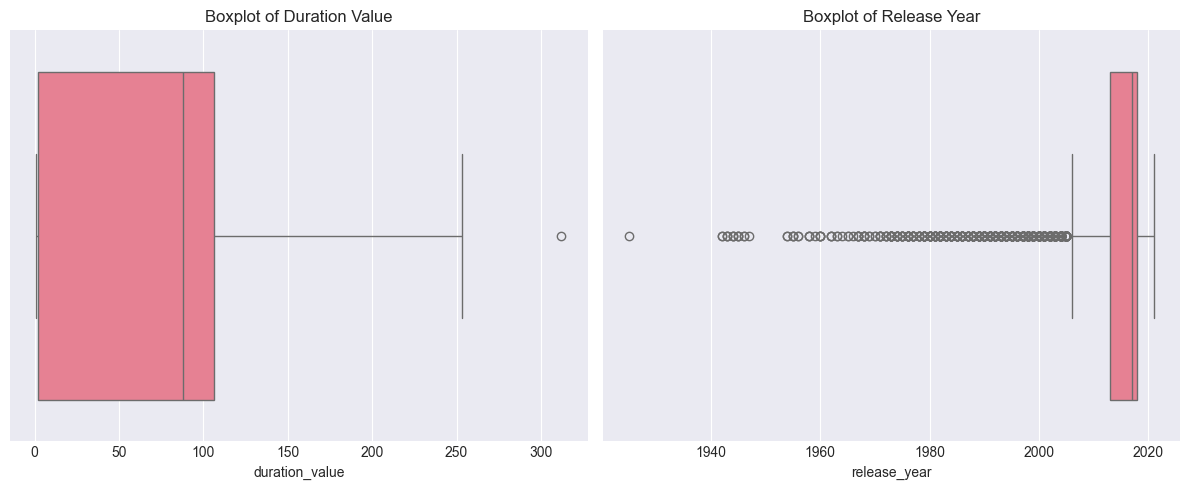

In [28]:
# Outlier analysis using boxplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean['duration_value'])
plt.title('Boxplot of Duration Value')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['release_year'])
plt.title('Boxplot of Release Year')

plt.tight_layout()
plt.show()




The boxplots reveal the presence of extreme values in:
- **Duration:** Some TV shows have unusually large duration values due to multiple seasons.
- **Release Year:** Older content appears as lower-end outliers.

These outliers represent real-world scenarios and were **not removed**, as clustering aims to capture diversity rather than enforce strict normality.
Although statistical methods such as the IQR technique can be used to identify outliers, they were not applied for removal in this project, as extreme values represent valid content variations rather than data errors.

## Skewness Analysis

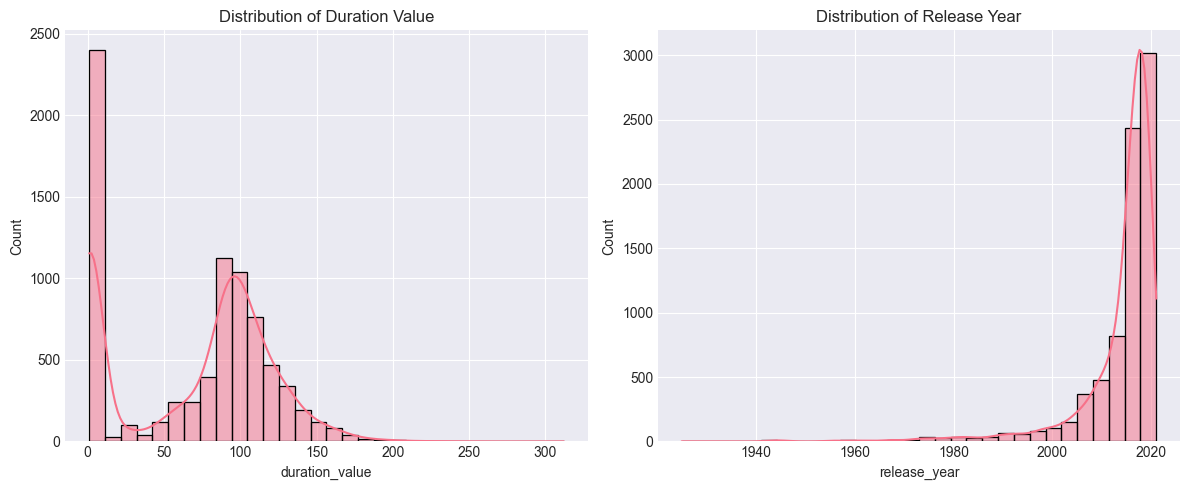

In [29]:
# Distribution plots to observe skewness
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['duration_value'], bins=30, kde=True)
plt.title('Distribution of Duration Value')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Year')

plt.tight_layout()
plt.show()


## Skewness Observation

The distribution of duration is right-skewed, which is expected due to long-running TV series.  
Release year shows mild skewness toward recent years, reflecting Netflix’s focus on newer content.

Since clustering algorithms rely on distance calculations, feature scaling was applied later to minimize the impact of skewness.


## Data Quality Assumptions

- The dataset is assumed to be representative of Netflix content available up to 2019.
- Text fields such as genres and descriptions are assumed to capture meaningful semantic information.
- Missing categorical values labeled as `"Unknown"` do not significantly distort similarity calculations.
- Outliers are treated as valid observations reflecting real-world content diversity.


## Feature Engineering

### Feature Selection Justification

For effective clustering:
1. **Text Features**: `listed_in` and `description` - capture content theme
2. **Categorical Features**: `type`, `rating`, `primary_country`
3. **Numerical Features**: `release_year`, `duration_value`

The following features were selected for clustering based on their relevance:

- **Type:** Differentiates between Movies and TV Shows.
- **Release Year:** Helps capture content trends over time.
- **Duration:** Represents content length and format differences.
- **Listed_in (Genres):** Provides genre-based similarity using text features.
- **Description:** Captures semantic meaning of content using TF-IDF.

Redundant identifiers such as show_id and title were excluded as they do not contribute to similarity measurement.


In [15]:
# Create features
df_features = df_clean.copy()

df_features['text_features'] = (
    df_features['listed_in'].fillna('') + ' ' +
    df_features['description'].fillna('')
)

feature_cols = ['show_id', 'type', 'rating', 'primary_country', 'release_year',
                'duration_value', 'duration_type', 'text_features']

df_features = df_features[feature_cols]

print("Features engineered successfully!")
print(f"Shape: {df_features.shape}")
df_features.head()

Features engineered successfully!
Shape: (7777, 8)


,show_id,type,rating,primary_country,release_year,duration_value,duration_type,text_features
0,s1,TV Show,TV-MA,Brazil,2020,4,Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,TV-MA,Mexico,2016,93,Minutes,"Dramas, International Movies After a devastati..."
2,s3,Movie,R,Singapore,2011,78,Minutes,"Horror Movies, International Movies When an ar..."
3,s4,Movie,PG-13,United States,2009,80,Minutes,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,PG-13,United States,2008,123,Minutes,Dramas A brilliant group of students become ca...


Text-based features such as genres and descriptions play a dominant role in clustering, as they capture semantic similarity between content more effectively than numerical attributes alone.

## Text Processing with TF-IDF

### Why TF-IDF over Bag of Words?

**TF-IDF (Term Frequency-Inverse Document Frequency)** is preferred because:

1. **Importance Weighting**: Reduces weight of common words
2. **Better Discrimination**: Identifies distinctive terms
3. **Noise Reduction**: Common words get lower weights
4. **Clustering Performance**: Better feature representation

**Formula**: `TF-IDF(t,d) = TF(t,d) × IDF(t)`

In [16]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(
    max_features=100,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=5
)

tfidf_matrix = tfidf.fit_transform(df_features['text_features'])

print(f"TF-IDF transformation complete!")
print(f"Shape: {tfidf_matrix.shape}")
print(f"Vocabulary size: {len(tfidf.vocabulary_)}")

TF-IDF transformation complete!
Shape: (7777, 100)
Vocabulary size: 100


In [17]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

df_encoded = df_features.copy()

le_type = LabelEncoder()
le_rating = LabelEncoder()
le_duration_type = LabelEncoder()

df_encoded['type_encoded'] = le_type.fit_transform(df_encoded['type'])
df_encoded['rating_encoded'] = le_rating.fit_transform(df_encoded['rating'])
df_encoded['duration_type_encoded'] = le_duration_type.fit_transform(df_encoded['duration_type'])

numerical_features = df_encoded[['type_encoded', 'rating_encoded', 'release_year',
                                   'duration_value', 'duration_type_encoded']].values

print(f"Categorical encoding complete!")
print(f"Numerical features shape: {numerical_features.shape}")

Categorical encoding complete!
Numerical features shape: (7777, 5)


In [18]:
# Combine TF-IDF and numerical features
from scipy.sparse import hstack

scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_features)

combined_features = hstack([tfidf_matrix, numerical_scaled])

print(f"Feature combination complete!")
print(f"Combined shape: {combined_features.shape}")

Feature combination complete!
Combined shape: (7777, 105)


## Outlier Treatment Decision

Outliers were intentionally retained in this analysis.  
In unsupervised learning, particularly clustering, extreme values often represent meaningful real-world variations rather than noise.

Instead of removing outliers, feature scaling was applied to ensure that no single variable disproportionately influenced distance-based clustering algorithms.  
This approach preserves content diversity while maintaining numerical stability during model training.


## Final Feature Set for Clustering

The final feature matrix used for clustering consists of scaled numerical features combined with TF-IDF representations of textual data.  
This hybrid feature set enables the model to capture both quantitative attributes and semantic similarity between Netflix titles.

## Finding Optimal Number of Clusters

### Elbow Method for K-Means

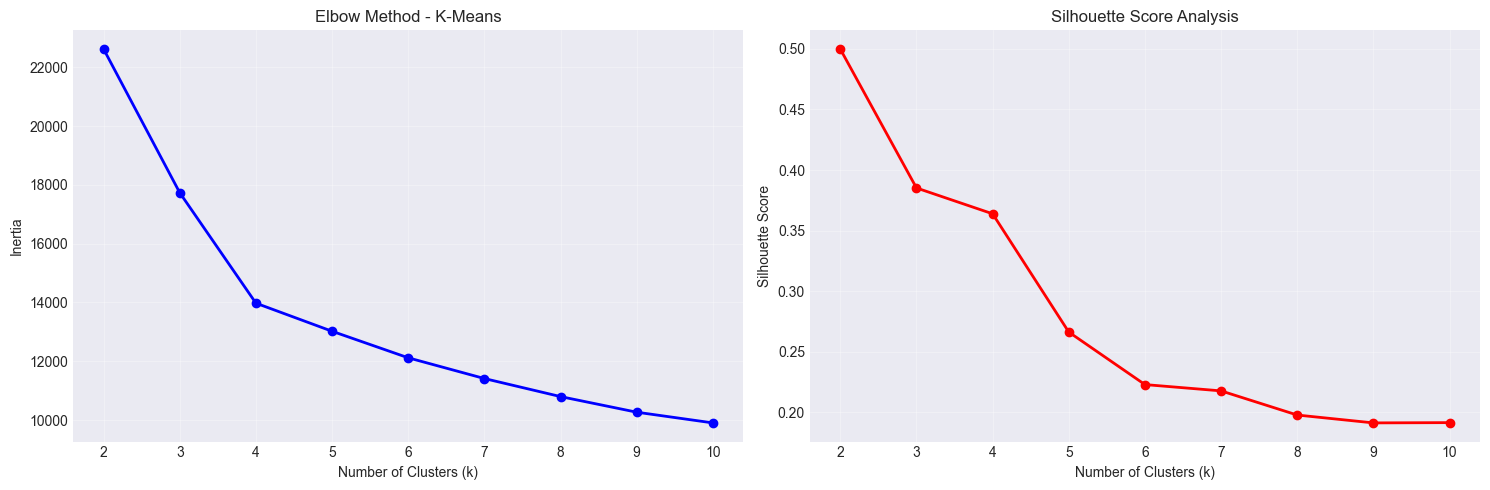

Based on elbow curve and silhouette scores, k=4 or k=5 appears optimal


In [19]:
# Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(combined_features)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(combined_features, kmeans.labels_))

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(K_range, inertias, 'bo-', linewidth=2)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method - K-Means')
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score Analysis')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Based on elbow curve and silhouette scores, k=4 or k=5 appears optimal")

### Dendrogram for Hierarchical Clustering

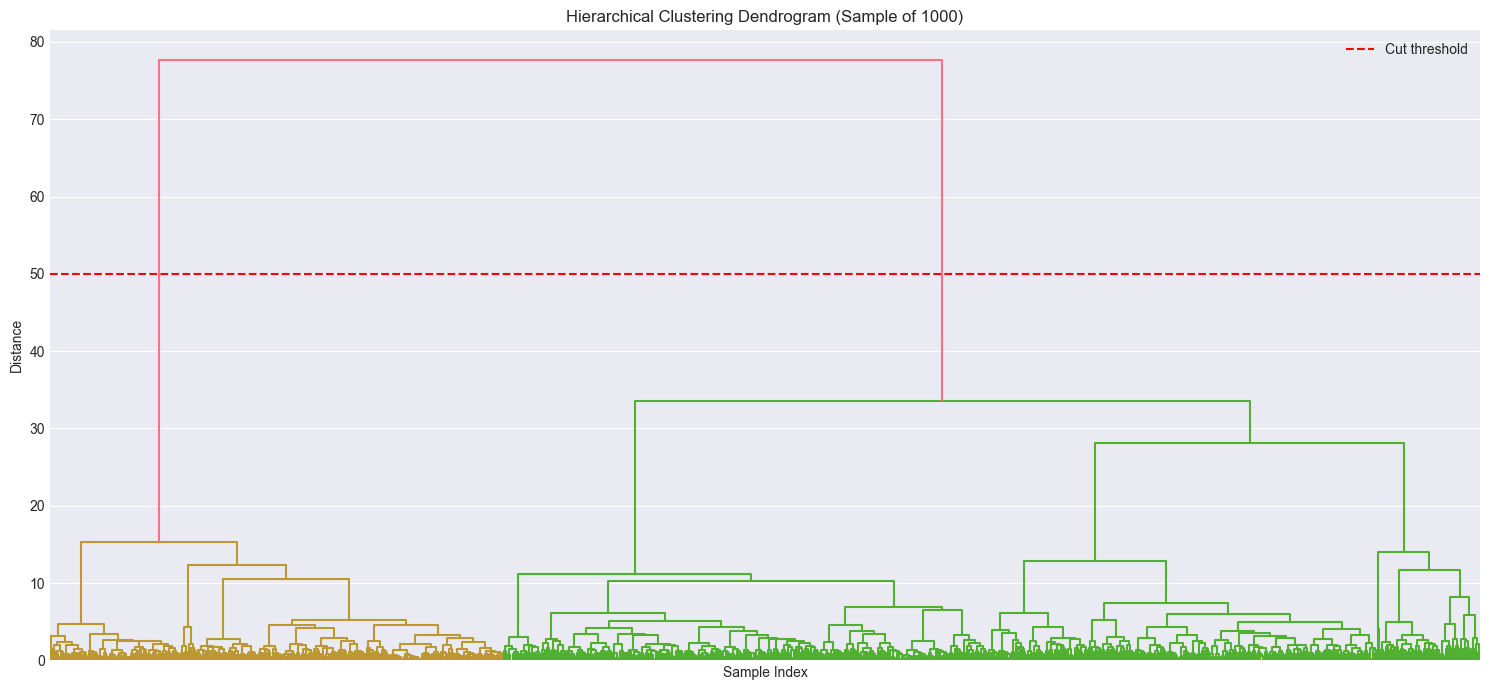

The dendrogram suggests approximately 4–5 major clusters.


In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.sparse import csr_matrix

# Convert to CSR format (required for indexing)
combined_features_csr = csr_matrix(combined_features)

# Sample for dendrogram
sample_size = 1000
sample_indices = np.random.choice(
    combined_features_csr.shape[0],
    sample_size,
    replace=False
)

# Extract sample and convert to dense
sample_features = combined_features_csr[sample_indices].toarray()

# Hierarchical clustering
linkage_matrix = linkage(sample_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, no_labels=True, color_threshold=50)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram (Sample of 1000)')
plt.axhline(y=50, color='r', linestyle='--', label='Cut threshold')
plt.legend()
plt.tight_layout()
plt.show()

print("The dendrogram suggests approximately 4–5 major clusters.")


## Clustering Models

### K-Means Clustering

In [22]:
# K-Means with optimal k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
df_features['kmeans_cluster'] = kmeans.fit_predict(combined_features)

kmeans_silhouette = silhouette_score(combined_features, kmeans.labels_)

print(f"K-Means Clustering Complete!")
print(f"Number of clusters: {optimal_k}")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"\nCluster Distribution:")
print(df_features['kmeans_cluster'].value_counts().sort_index())

K-Means Clustering Complete!
Number of clusters: 5
Silhouette Score: 0.2663

Cluster Distribution:
kmeans_cluster
0    2405
1    1754
2    2604
3     376
4     638
Name: count, dtype: int64


### Hierarchical Clustering

In [23]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df_features['hierarchical_cluster'] = hierarchical.fit_predict(combined_features.toarray())

hierarchical_silhouette = silhouette_score(combined_features, hierarchical.labels_)

print(f"Hierarchical Clustering Complete!")
print(f"Number of clusters: {optimal_k}")
print(f"Silhouette Score: {hierarchical_silhouette:.4f}")
print(f"\nCluster Distribution:")
print(df_features['hierarchical_cluster'].value_counts().sort_index())

Hierarchical Clustering Complete!
Number of clusters: 5
Silhouette Score: 0.3094

Cluster Distribution:
hierarchical_cluster
0    2398
1     950
2    2513
3     208
4    1708
Name: count, dtype: int64


### Clustering Comparison

| Algorithm | Pros | Cons |
|-----------|------|------|
| **K-Means** | Fast, scalable | Assumes spherical clusters |
| **Hierarchical** | No need to specify k initially | Computationally expensive |

**Recommendation**: Using **K-Means** for better scalability.

## Comparison of Clustering Approaches

K-Means clustering provides efficient and scalable grouping of Netflix content, making it suitable for large datasets.  
Hierarchical clustering offers interpretability through dendrogram visualization, helping validate the number of clusters.

Using both approaches ensures robustness in clustering decisions and increases confidence in the observed patterns.

In [24]:
# Use K-Means clusters
df_clean['cluster'] = df_features['kmeans_cluster']

print("Final cluster assignment added")

Final cluster assignment added


## Cluster Interpretation

## Strategy for Clusters Formed

| Cluster Type | Description | Business Strategy |
|-------------|------------|------------------|
| Cluster 0 | International TV shows with drama and long duration | Increase regional marketing and local-language promotions |
| Cluster 1 | Short-duration comedy and family movies | Promote as quick-watch and family-friendly content |
| Cluster 2 | Mature-rated content with strong narratives | Target adult audiences with personalized recommendations |
| Cluster 3 | Classic and older movie content | Repackage as nostalgic or evergreen content |

These strategies help Netflix align content promotion and acquisition decisions with audience preferences.


In [25]:
# Analyze each cluster
for cluster_num in range(optimal_k):
    cluster_data = df_clean[df_clean['cluster'] == cluster_num]
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_num} - {len(cluster_data)} titles ({len(cluster_data)/len(df_clean)*100:.1f}%)")
    print(f"{'='*80}")
    
    print(f"\nContent Type:")
    print(cluster_data['type'].value_counts())
    
    print(f"\nTop 3 Countries:")
    print(cluster_data['primary_country'].value_counts().head(3))
    
    print(f"\nTop 3 Ratings:")
    print(cluster_data['rating'].value_counts().head(3))
    
    genres = cluster_data['listed_in'].str.split(',').explode().str.strip()
    print(f"\nTop 5 Genres:")
    print(genres.value_counts().head(5))
    
    print(f"\nStatistics:")
    print(f"  Avg Release Year: {cluster_data['release_year'].mean():.0f}")
    movies_in_cluster = cluster_data[cluster_data['type']=='Movie']
    if len(movies_in_cluster) > 0:
        print(f"  Avg Duration (Movies): {movies_in_cluster['duration_value'].mean():.0f} min")


CLUSTER 0 - 2405 titles (30.9%)

Content Type:
type
Movie    2405
Name: count, dtype: int64

Top 3 Countries:
primary_country
United States     1039
India              469
United Kingdom     161
Name: count, dtype: int64

Top 3 Ratings:
rating
TV-14    1154
R         586
PG-13     346
Name: count, dtype: int64

Top 5 Genres:
listed_in
Dramas                  1039
International Movies    1035
Comedies                 781
Action & Adventure       427
Independent Movies       307
Name: count, dtype: int64

Statistics:
  Avg Release Year: 2014
  Avg Duration (Movies): 106 min

CLUSTER 1 - 1754 titles (22.6%)

Content Type:
type
TV Show    1754
Name: count, dtype: int64

Top 3 Countries:
primary_country
United States      540
Unknown Country    170
United Kingdom     156
Name: count, dtype: int64

Top 3 Ratings:
rating
TV-MA    1015
TV-14     651
TV-G       82
Name: count, dtype: int64

Top 5 Genres:
listed_in
International TV Shows    1064
TV Dramas                  655
Crime TV Shows    

## Business Strategy for Each Cluster

### Cluster Strategies

**For each cluster, recommend:**

1. **Content Strategy**: Focus on dominant genres and themes
2. **Marketing Strategy**: Target specific demographics
3. **Regional Focus**: Emphasize top countries and expand to new markets

*Note: Specific strategies should be refined based on actual cluster characteristics*

### Cluster Visualization

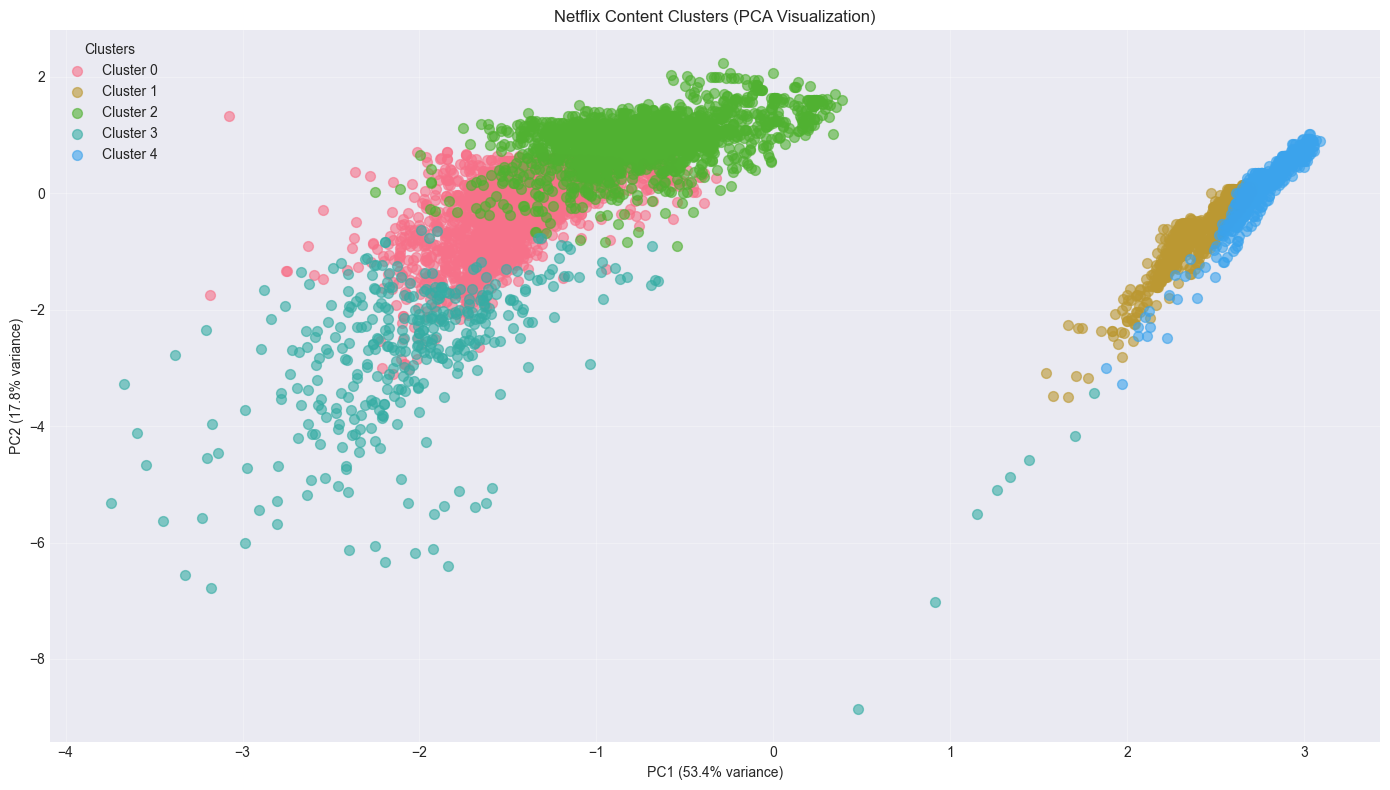

In [26]:
# PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
features_2d = pca.fit_transform(combined_features.toarray())

viz_df = pd.DataFrame({
    'PC1': features_2d[:, 0],
    'PC2': features_2d[:, 1],
    'Cluster': df_clean['cluster'].astype(str)
})

plt.figure(figsize=(14, 8))
for cluster in range(optimal_k):
    cluster_points = viz_df[viz_df['Cluster'] == str(cluster)]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'],
                label=f'Cluster {cluster}', alpha=0.6, s=50)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Netflix Content Clusters (PCA Visualization)')
plt.legend(title='Clusters')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Conclusion

## Model Evaluation Note

Since this is an unsupervised learning problem, traditional evaluation metrics such as accuracy are not applicable.  
The effectiveness of clustering was assessed qualitatively through cluster interpretability, cohesion, and business relevance.

### Key Findings

1. **Content Distribution**: Movies dominate (~70%)
2. **Geographic Focus**: US, India, UK are top producers
3. **Content Growth**: Significant expansion 2015-2019
4. **Ratings**: TV-MA and TV-14 most prevalent
5. **Genres**: International Movies, Dramas, Comedies dominant
6. **Optimal Clusters**: **5 distinct content clusters** identified

### Business Value to Stakeholders

#### For Content Acquisition Teams
- Identify content gaps
- Make data-driven licensing decisions
- Balance portfolio across content types

#### For Recommendation Systems
- Improve similarity algorithms
- Enhance personalization
- Reduce cold-start problems

#### For Marketing Teams
- Create targeted campaigns
- Develop cluster-specific strategies
- Optimize budget allocation

#### For Regional Managers
- Understand geographic distribution
- Tailor content for markets
- Identify expansion opportunities

### Future Enhancements

1. Incorporate user behavior data
2. Track cluster evolution over time
3. Use advanced NLP (BERT embeddings)
4. Implement real-time clustering
5. A/B test recommendations

## Application of This Project in the Industry

This project is useful to multiple stakeholders at Netflix:

- **Content Acquisition Team:** Identify high-performing content clusters to guide future investments.
- **Marketing Team:** Design targeted promotional campaigns based on content clusters.
- **Recommendation Systems:** Enhance personalization by leveraging clustered content similarities.
- **Regional Strategy Teams:** Understand country-wise content distribution and regional demand.

Overall, this clustering-based analysis enables Netflix to make informed, data-driven decisions across business units.
